In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [176]:
oevs=0.8
sevs=0.8
mood=0.8

sens =0.8
thoughts =0.8
beta=1.0


coping = 0.5
diatheses = 0.5
lt_prosp_mood=0.8

# oevs=0.999
# sevs=0.6
# mood=0.6

# sens =0.6
# thoughts =0.6
# beta=1.0


# coping = 0.01
# diatheses = 0.99
# lt_prosp_mood=0.6

oo=[]
ss=[]
mm=[]


wt_sevs_mood = 0.7
wt_thoughts_mood = 0.3
wt_sevs_thoughts = 0.6
wt_mood_thoughts = 0.4
wt_mood_sens = 0.5
wt_thoughts_sens = 0.5



dt=0.1
for t in range(0,1000):
    if t==350:
        oevs=0.5
        
        
    beta = beta + ((diatheses*((mood/lt_prosp_mood) - beta)) +coping*(1-beta))  * dt 
#     st_prosp_mood = beta*lt_prosp_mood
    
    d_mood = mood - beta * lt_prosp_mood # beta * lt_prosp_mood is st_prosp_mood
    if d_mood>=0:
        omega=oevs*d_mood
    else:
        omega=(1-oevs)*d_mood
    oevs = oevs -sens * omega * dt
   
    
    
    
    gamma = diatheses*oevs*thoughts + coping*(1-(1-oevs)*(1-thoughts))
    sevs = sevs + (gamma-sevs)* dt
    
    
    phi = sevs * wt_sevs_mood + thoughts*wt_thoughts_mood
    if  phi >= mood:
        mood = mood + coping*(phi-mood)* dt
    else:
        mood = mood + diatheses*(phi-mood)* dt
        
        
    phi = sevs * wt_sevs_thoughts + mood*wt_mood_thoughts 
    if  phi >= thoughts:
        thoughts = thoughts + coping*(phi-thoughts)* dt
    else:
        thoughts = thoughts + diatheses*(phi-thoughts)* dt

        
        
    phi = mood * wt_mood_sens + thoughts*wt_thoughts_sens
    if  phi >= sens:
        sens = sens + coping*(phi-sens)* dt
    else:
        sens = sens + diatheses*(phi-sens)* dt
        
        

#     print(oevs)
    oo.append(oevs) 
    ss.append(sevs)
    mm.append(mood)
        
    

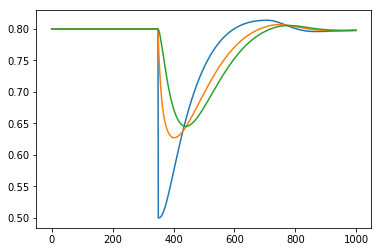

In [177]:
plt.plot(oo)
plt.plot(ss)
plt.plot(mm)
plt.show()

In [168]:
# kk[0:35]
beta,oevs

(0.9984657201211438, 0.7980472859100561)

In [169]:
mood

0.7975727310918154

In [170]:
((diatheses*((mood/lt_prosp_mood) - beta)) +coping*(1-beta)) 

1.723681124082832e-05

In [171]:
sens

0.797586787675341

In [172]:
thoughts

0.7975708442523682

In [173]:
oevs

0.7980472859100561